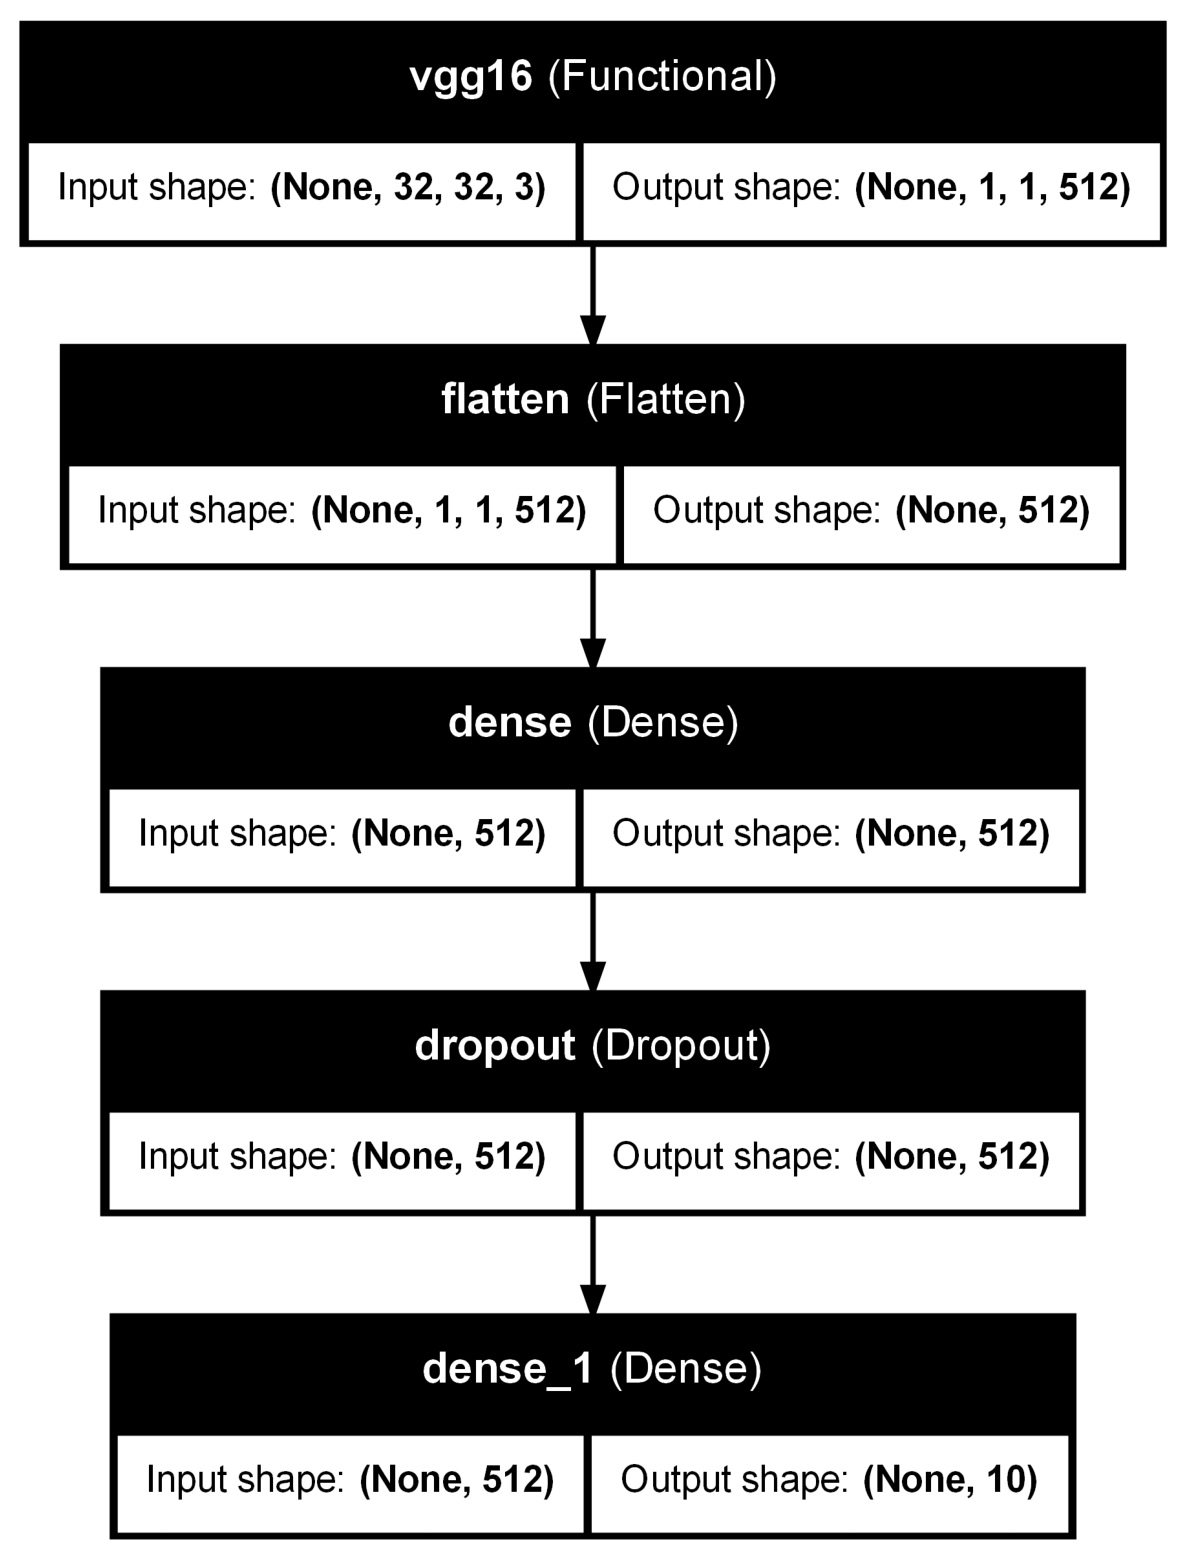

Epoch 1/10
 313/1250 ━━━━━━━━━━━━━━━━━━━━ 3:14 208ms/step - accuracy: 0.1721 - loss: 2.2820

In [ ]:
# Install Graphviz (run this in Anaconda Prompt or terminal before running the script)
# conda install -c conda-forge python-graphviz -y

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Load VGG16 without top layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Build model
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Save and display model diagram
plot_model(model, to_file='cnn.png', show_shapes=True, show_layer_names=True, dpi=300)

plt.figure(figsize=(20, 20))
img = plt.imread('cnn.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# Train model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Make prediction on a sample
sample = x_test[0].reshape(1, 32, 32, 3)
prediction = model.predict(sample)
predicted_class = class_names[np.argmax(prediction)]

# Show prediction
plt.imshow(x_test[0])
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
